## Distribution of ColabFold and ESMFold pTM scores

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_meta = "../2_protein_structure_prediction/virosphere-fold-v1_predicted_dataset.csv"
df_meta = pd.read_csv(file_meta)

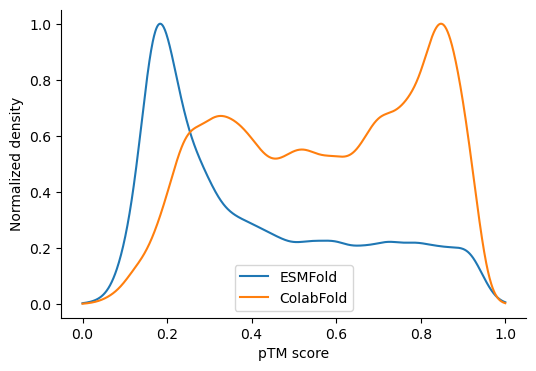

In [3]:
from scipy.stats import gaussian_kde

# Split the data based on 'Pfam_annotation_type'
data1 = df_meta[df_meta['esmfold_log_pTM'].notna()]['esmfold_log_pTM']
data2 = df_meta[df_meta['colabfold_json_pTM'].notna()]['colabfold_json_pTM']

# Compute KDE
kde1 = gaussian_kde(data1)
kde2 = gaussian_kde(data2)

# Create a range of values for the x-axis
x = np.linspace(0, 1, 1000)

# Compute the densities
density1 = kde1(x)
density2 = kde2(x)

# Normalize the densities
density1 /= density1.max()
density2 /= density2.max()

# Plot the normalized densities
plt.figure(figsize=(6, 4))
plt.plot(x, density1, label='ESMFold')
plt.plot(x, density2, label='ColabFold')
plt.xlabel('pTM score')
plt.ylabel('Normalized density')
plt.legend()
# remove box around the plot
sns.despine()
#plt.savefig('./figures/esmfold_colabfold_ptm_normalised_kde_distribution.svg', bbox_inches='tight', format='svg')
plt.show()

In [ ]:
# ESMFold pTM score statistics
data1.describe()

count    84964.000000
mean         0.402880
std          0.245756
min          0.009000
25%          0.195000
50%          0.312000
75%          0.596000
max          0.972000
Name: esmfold_log_pTM, dtype: float64

In [ ]:
# ColabFold pTM score statistics
data2.describe()

count    85162.000000
mean         0.575078
std          0.232717
min          0.020000
25%          0.370000
50%          0.590000
75%          0.790000
max          0.950000
Name: colabfold_json_pTM, dtype: float64

In [9]:
df_meta['esmfold_colabfold_pTM_difference'] = df_meta['esmfold_log_pTM'] - df_meta['colabfold_json_pTM']

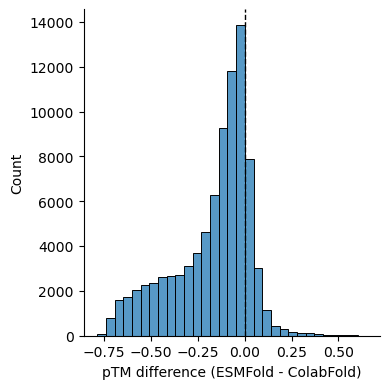

In [10]:
# 31 and 20 bins give a clear line between ESMFold and ColabFold sets
#plt.figure(figsize=(2, 4))

sns.displot(df_meta['esmfold_colabfold_pTM_difference'], bins=31, height=4, aspect=1)

plt.axvline(0, color='black', linestyle='--', linewidth=1)

plt.ylabel('Count', fontsize=10)
plt.xlabel('pTM difference (ESMFold - ColabFold)', fontsize=10)

#plt.savefig("./figures/esmfold_colabfold_ptm_difference_histogram.svg", format='svg')

plt.show()

In [14]:
df_meta[df_meta['esmfold_colabfold_pTM_difference'] > 0].shape[0] / df_meta.shape[0] * 100

15.740588525398651

In [23]:
df_meta[df_meta['esmfold_colabfold_pTM_difference'] > 0.2].shape[0]

848